In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Dropout, SeparableConv2D

#Load Data and Exploration

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Concatenate training and test sets for analysis
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

#Data Distribution and Visualization

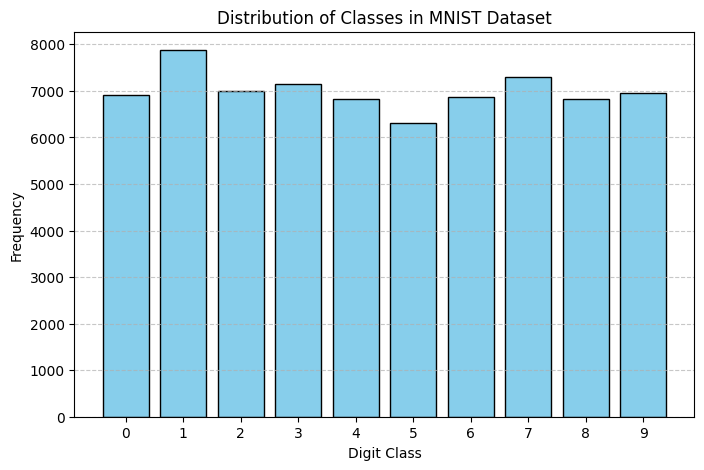

In [4]:
# Plot distribution of classes
plt.figure(figsize=(8, 5))
plt.hist(y_all, bins=np.arange(11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST Dataset')
plt.savefig('data_distribution.png')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# Display dataset properties
print("Total number of images:", len(x_all))
print("Image shape:", x_all[0].shape)
print("Number of unique classes:", len(np.unique(y_all)))

Total number of images: 70000
Image shape: (28, 28)
Number of unique classes: 10


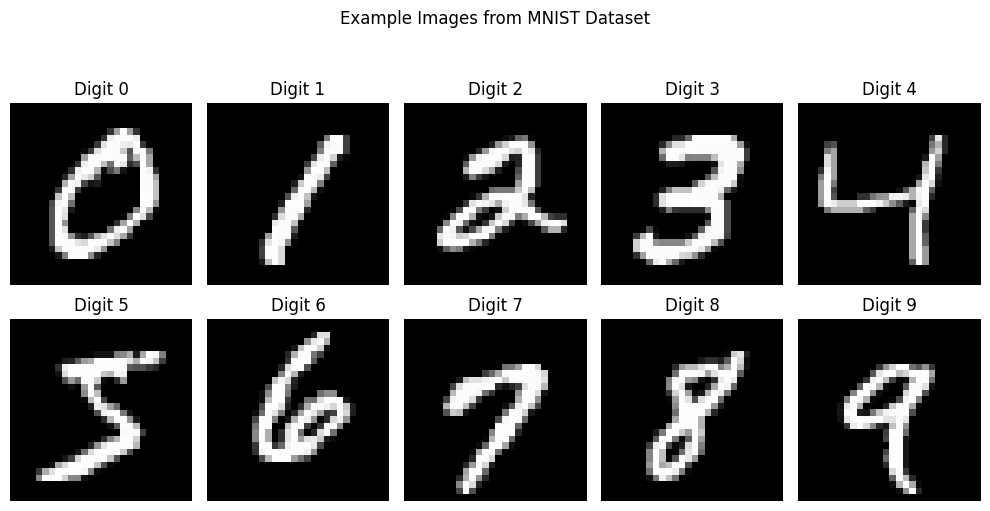

In [6]:
# Display example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_all[y_all == i][0], cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.suptitle('Example Images from MNIST Dataset', y=1.05)
plt.savefig('mnist_images.png')
plt.tight_layout()
plt.show()

##Data Standardization

In [7]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize images
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

In [8]:
print('Train images shape: ',X_train.shape)
print('Train labels shape: ',y_train.shape)
print('Test images shape: ',X_test.shape)
print('Test images shape: ',y_test.shape)

Train images shape:  (60000, 28, 28, 1)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28, 1)
Test images shape:  (10000,)


In [9]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


##Adding Noise to Mnist Dataset

In [10]:
def add_noise_to_mnist(images, noise_level):
    """
    Add Gaussian noise with specified variance (noise_level) to the MNIST images.

    Parameters:
        images (numpy.ndarray): The MNIST images array.
        noise_level (float): The variance of the Gaussian noise to be added.

    Returns:
        numpy.ndarray: The MNIST images with added noise.
    """
    noisy_images = images + noise_level * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

##Convolutional Neural Network

In [11]:
# Define noise levels
noise_levels = [0.05, 0.1, 0.175, 0.25, 0.3, 0.5, 0.62, 0.75]

# List to store CNN models for different noise levels
cnn_models = []

# Define callbacks for early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

for noise_level in noise_levels:
    print(f"Training CNN model for noise level: {noise_level}")
    # Add noise to the training data
    X_train_noise = add_noise_to_mnist(X_train, noise_level)

    # Split the noisy data into train and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_noise, y_train, test_size=0.2, random_state=42)

    # Create CNN model
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model with early stopping
    history = cnn_model.fit(X_train_split, y_train_split, epochs=20, validation_data=(X_val_split, y_val_split), callbacks=[early_stopping])

    # Add the model to the list
    cnn_models.append(cnn_model)

Training CNN model for noise level: 0.05
Epoch 1/20
1500/1500 [==============================] - 64s 41ms/step - loss: 0.1706 - accuracy: 0.9485 - val_loss: 0.0727 - val_accuracy: 0.9792
Epoch 2/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0636 - val_accuracy: 0.9794
Epoch 3/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0371 - val_accuracy: 0.9882
Epoch 4/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 5/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0369 - val_accuracy: 0.9887
Epoch 6/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 7/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.014

###Evaluation

In [12]:
# Evaluate the models on test data
test_results = []
for cnn_model in cnn_models:
    loss, accuracy = cnn_model.evaluate(X_test, y_test)
    test_results.append({'loss': loss, 'accuracy': accuracy})

313/313 [==============================] - 4s 12ms/step - loss: 0.0815 - accuracy: 0.9762


In [13]:
# Print results
print("Results:")
for noise_level, result in zip(noise_levels, test_results):
    print(f"Noise Level: {noise_level}, Loss: {result['loss']}, Accuracy: {result['accuracy']}")

Results:
Noise Level: 0.05, Loss: 0.02813718654215336, Accuracy: 0.9914000034332275
Noise Level: 0.1, Loss: 0.03388538211584091, Accuracy: 0.9901000261306763
Noise Level: 0.175, Loss: 0.03139558807015419, Accuracy: 0.989799976348877
Noise Level: 0.25, Loss: 0.03393847495317459, Accuracy: 0.9898999929428101
Noise Level: 0.3, Loss: 0.03372875228524208, Accuracy: 0.989799976348877
Noise Level: 0.5, Loss: 0.0481676422059536, Accuracy: 0.9866999983787537
Noise Level: 0.62, Loss: 0.060520585626363754, Accuracy: 0.9825999736785889
Noise Level: 0.75, Loss: 0.08149392157793045, Accuracy: 0.9761999845504761


313/313 [==============================] - 5s 16ms/step
Metrics for noise level 0.05:
Accuracy: 0.9914
Precision: 0.9914292589899198
Recall: 0.9914
F1 Score: 0.991396549767054



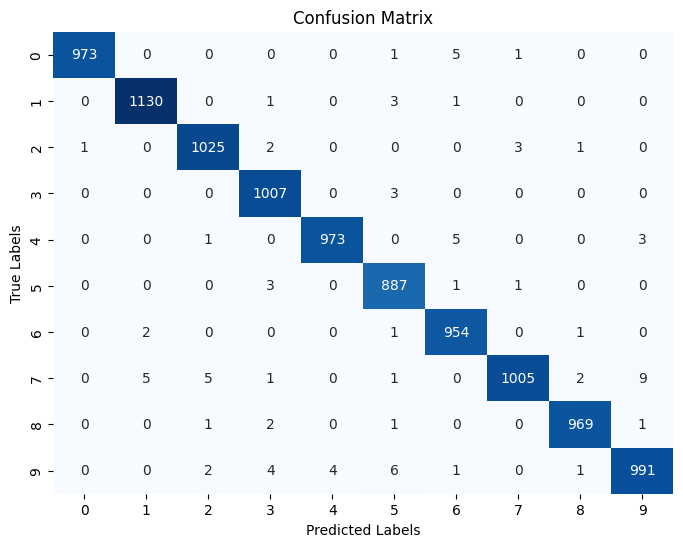

313/313 [==============================] - 5s 17ms/step
Metrics for noise level 0.1:
Accuracy: 0.9901
Precision: 0.9901553215381955
Recall: 0.9901
F1 Score: 0.9900987225536655



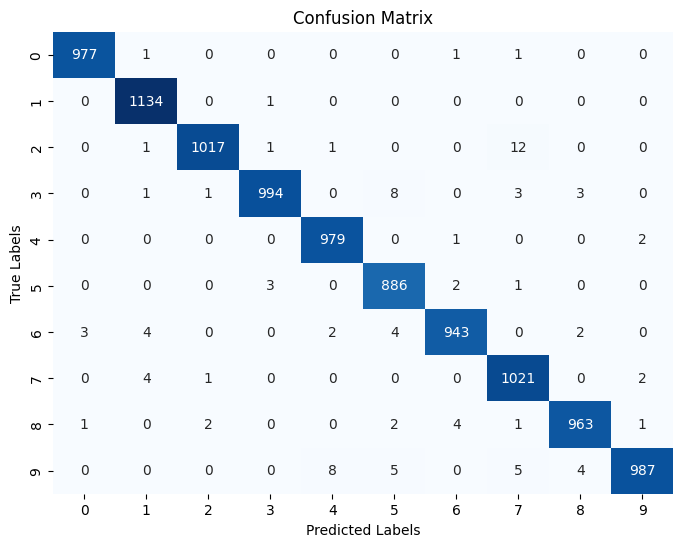

313/313 [==============================] - 3s 9ms/step
Metrics for noise level 0.175:
Accuracy: 0.9898
Precision: 0.9898534253287667
Recall: 0.9898
F1 Score: 0.9897995518839684



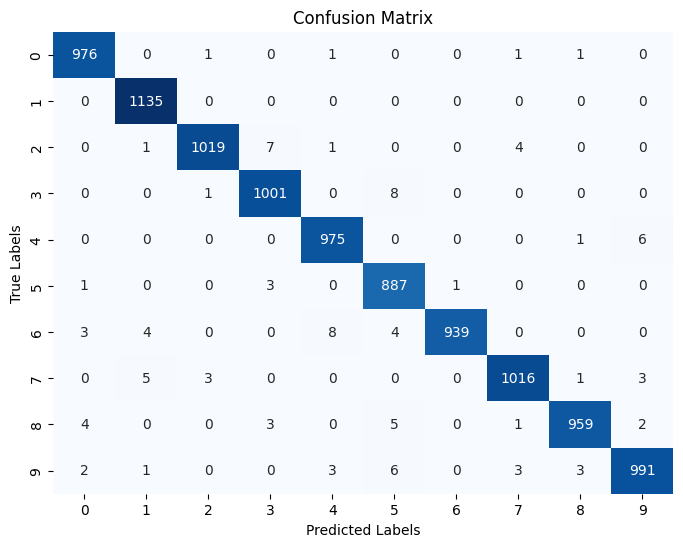

313/313 [==============================] - 2s 8ms/step
Metrics for noise level 0.25:
Accuracy: 0.9899
Precision: 0.9899311207590948
Recall: 0.9899
F1 Score: 0.9898981018289834



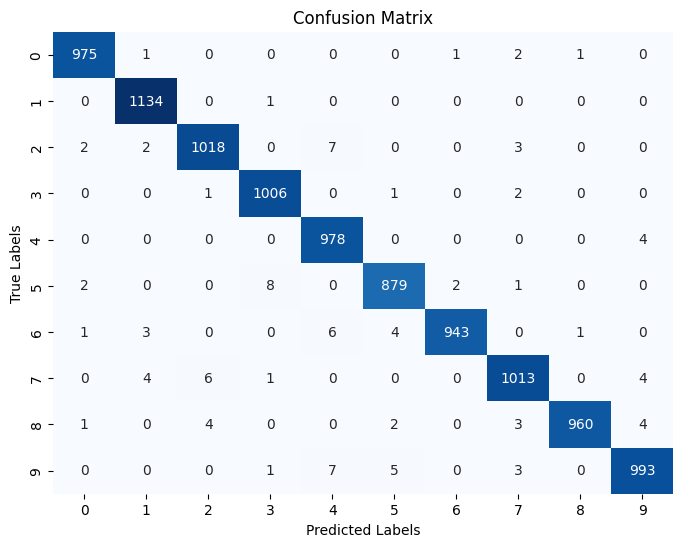

313/313 [==============================] - 4s 12ms/step
Metrics for noise level 0.3:
Accuracy: 0.9898
Precision: 0.989820339852397
Recall: 0.9898
F1 Score: 0.9897990859510113



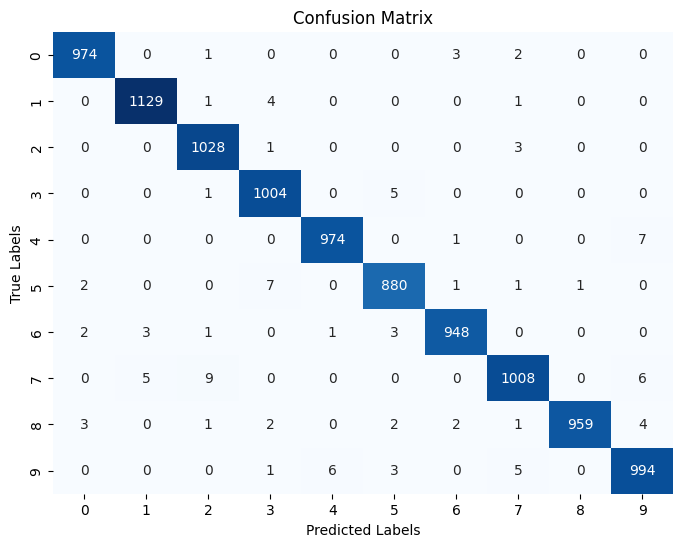

313/313 [==============================] - 3s 8ms/step
Metrics for noise level 0.5:
Accuracy: 0.9867
Precision: 0.9867606044245515
Recall: 0.9867
F1 Score: 0.9866844042098153



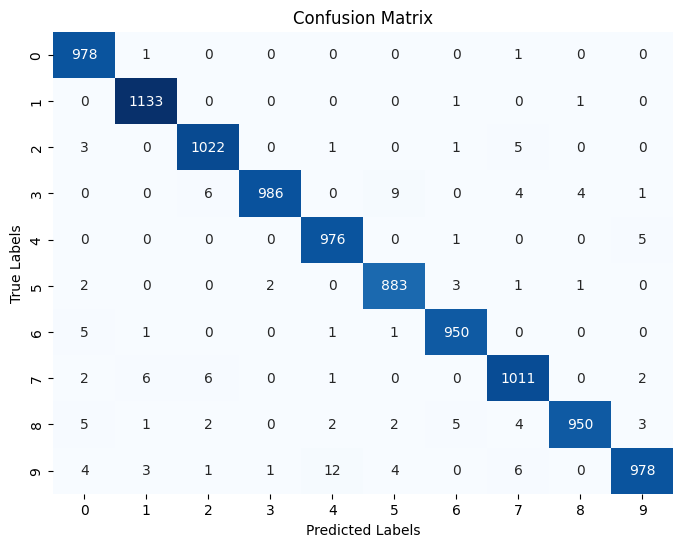

313/313 [==============================] - 3s 10ms/step
Metrics for noise level 0.62:
Accuracy: 0.9826
Precision: 0.9827028608699359
Recall: 0.9826
F1 Score: 0.9825935510358902



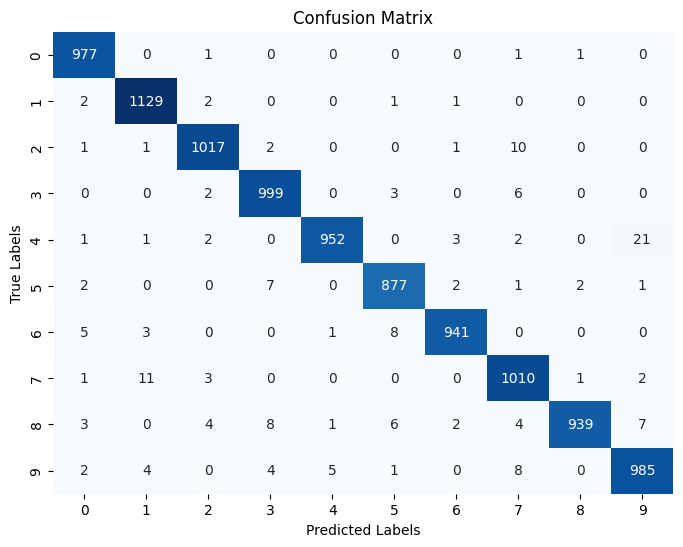

313/313 [==============================] - 3s 8ms/step
Metrics for noise level 0.75:
Accuracy: 0.9762
Precision: 0.9764600111725483
Recall: 0.9762
F1 Score: 0.9762073360392



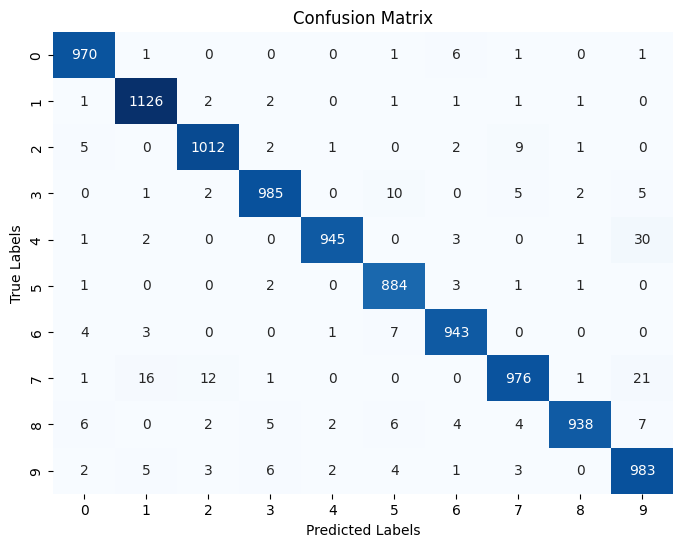

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Assume X_test, y_test are defined and preprocessed appropriately

# Lists to store metrics for each noise level
accuracies = []
confusion_matrices = []
precisions = []
recalls = []
f1_scores = []

# Evaluate each model
for noise_level, model in zip(noise_levels, cnn_models):
    # Predict labels for the test dataset
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    accuracies.append(accuracy)

    cm = confusion_matrix(y_test, y_pred_classes)
    confusion_matrices.append(cm)

    precision = precision_score(y_test, y_pred_classes, average='weighted')
    precisions.append(precision)

    recall = recall_score(y_test, y_pred_classes, average='weighted')
    recalls.append(recall)

    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    f1_scores.append(f1)

    # Print results for each noise level
    print(f"Metrics for noise level {noise_level}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



###Plotting the Test Loss and Accuracy

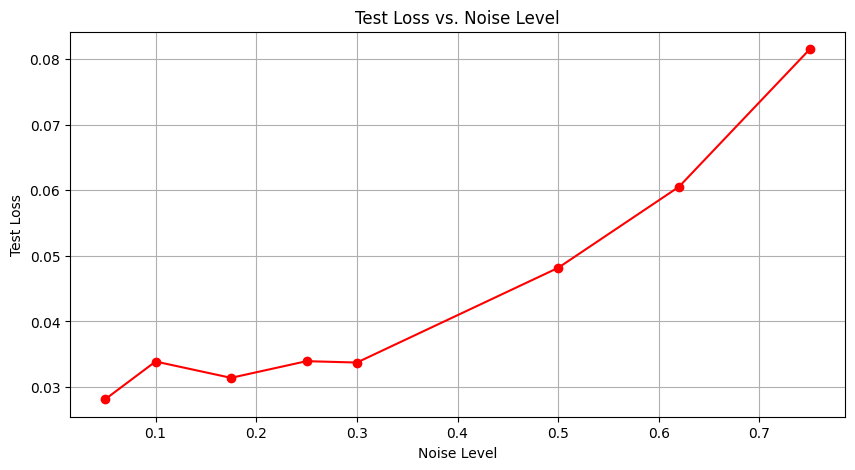

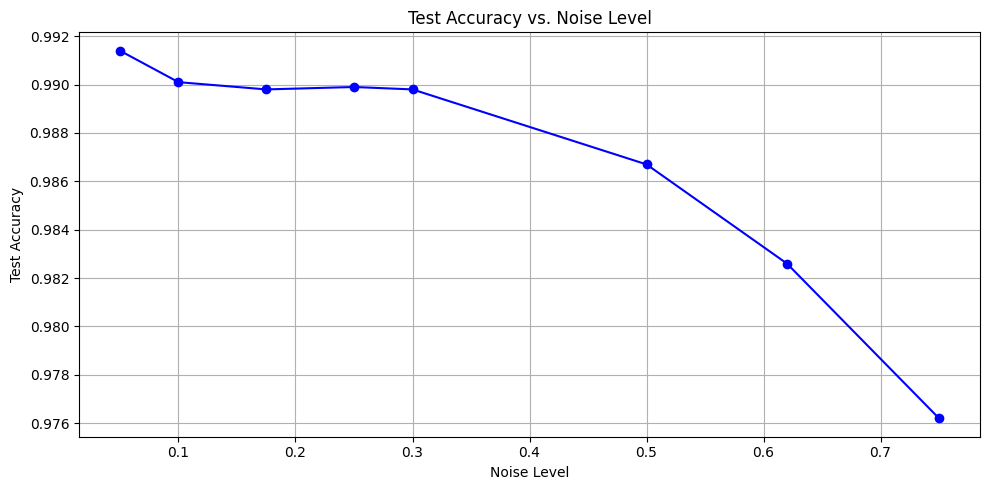

In [16]:
cnn_test_losses = []
cnn_test_accuracies = []

for result in test_results:
    cnn_test_losses.append(result['loss'])
    cnn_test_accuracies.append(result['accuracy'])

# Plot test loss and accuracy vs. noise level
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, cnn_test_losses, marker='o', color = 'r')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.grid(True)


plt.figure(figsize=(10, 5))
plt.plot(noise_levels, cnn_test_accuracies, marker='o', color = 'b')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True)


plt.tight_layout()
plt.show()

##Denoising AutoEncoder

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_images_flat = x_train.reshape((len(x_train), 28*28))
test_images_flat = x_test.reshape((len(x_test), 28*28))

In [18]:
def denoising_autoencoder():
    input_layer = Input(shape=(28*28,))
    encoded = Dense(128, activation='relu')(input_layer)
    decoded = Dense(28*28, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
    return autoencoder

In [ ]:
dae_models = []
histories = []

def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

for noise_level in noise_levels:
    print(f"Training denoising autoencoder for noise level: {noise_level}")
    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)

    autoencoder = denoising_autoencoder()

    history = autoencoder.fit(noisy_train_images, train_images_flat,
                              epochs=20, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

    dae_models.append(autoencoder)
    histories.append(history)

Training denoising autoencoder for noise level: 0.05
Epoch 1/20
211/211 [==============================] - 5s 20ms/step - loss: 0.2200 - val_loss: 0.1391
Epoch 2/20
211/211 [==============================] - 3s 14ms/step - loss: 0.1187 - val_loss: 0.1043
Epoch 3/20
211/211 [==============================] - 5s 22ms/step - loss: 0.0968 - val_loss: 0.0914
Epoch 4/20
211/211 [==============================] - 6s 27ms/step - loss: 0.0874 - val_loss: 0.0847
Epoch 5/20
211/211 [==============================] - 4s 17ms/step - loss: 0.0821 - val_loss: 0.0807
Epoch 6/20
211/211 [==============================] - 3s 13ms/step - loss: 0.0787 - val_loss: 0.0781
Epoch 7/20
211/211 [==============================] - 3s 14ms/step - loss: 0.0765 - val_loss: 0.0761
Epoch 8/20
211/211 [==============================] - 4s 17ms/step - loss: 0.0748 - val_loss: 0.0748
Epoch 9/20
211/211 [==============================] - 4s 18ms/step - loss: 0.0735 - val_loss: 0.0736
Epoch 10/20
211/211 [=================

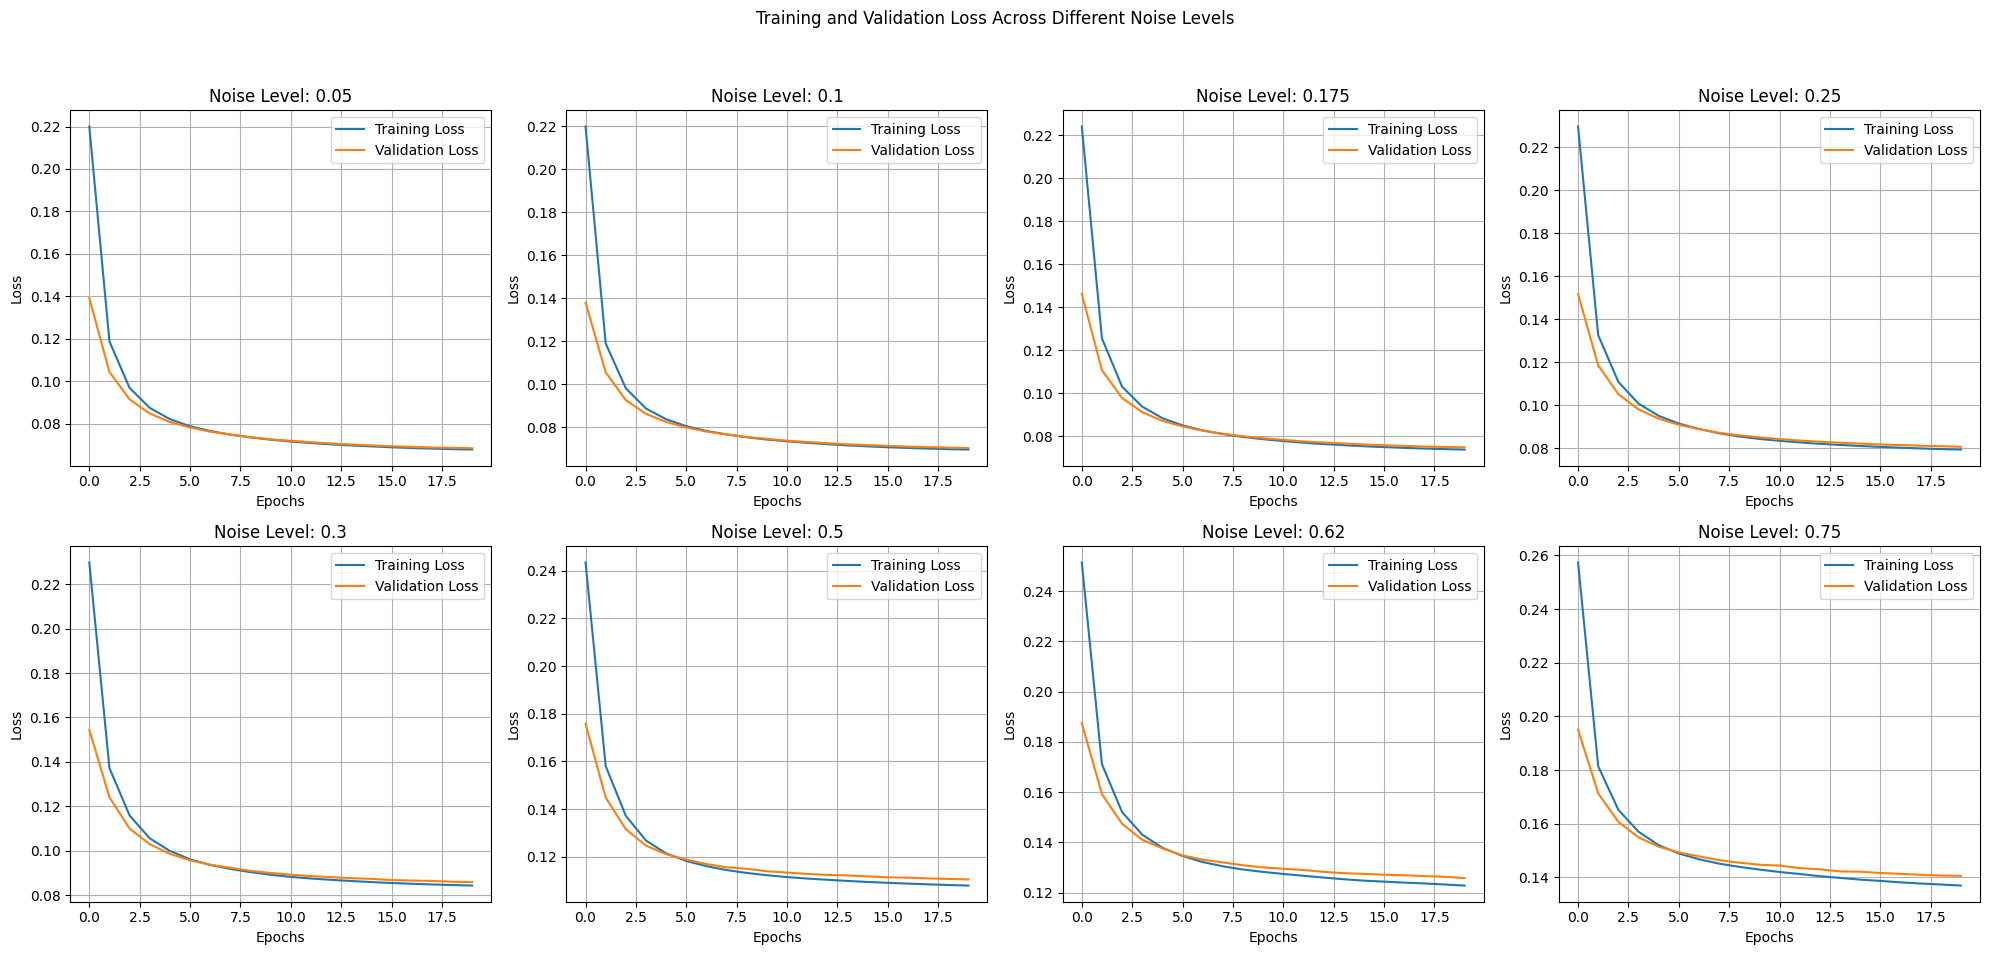

In [26]:
# Number of plots, and setting up subplots grid
num_plots = len(histories)
cols = 4  # Maximum of 4 columns per row
rows = (num_plots + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust size as needed
fig.suptitle('Training and Validation Loss Across Different Noise Levels')

# Iterate through all histories and plot them
for i, history in enumerate(histories):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Adjust indexing based on rows
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'Noise Level: {noise_levels[i]}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# If there are any empty subplots, turn them off
for i in range(num_plots, rows * cols):
    axes[i // cols, i % cols].axis('off') if rows > 1 else axes[i % cols].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###Image Reconstruction

313/313 [==============================] - 1s 2ms/step


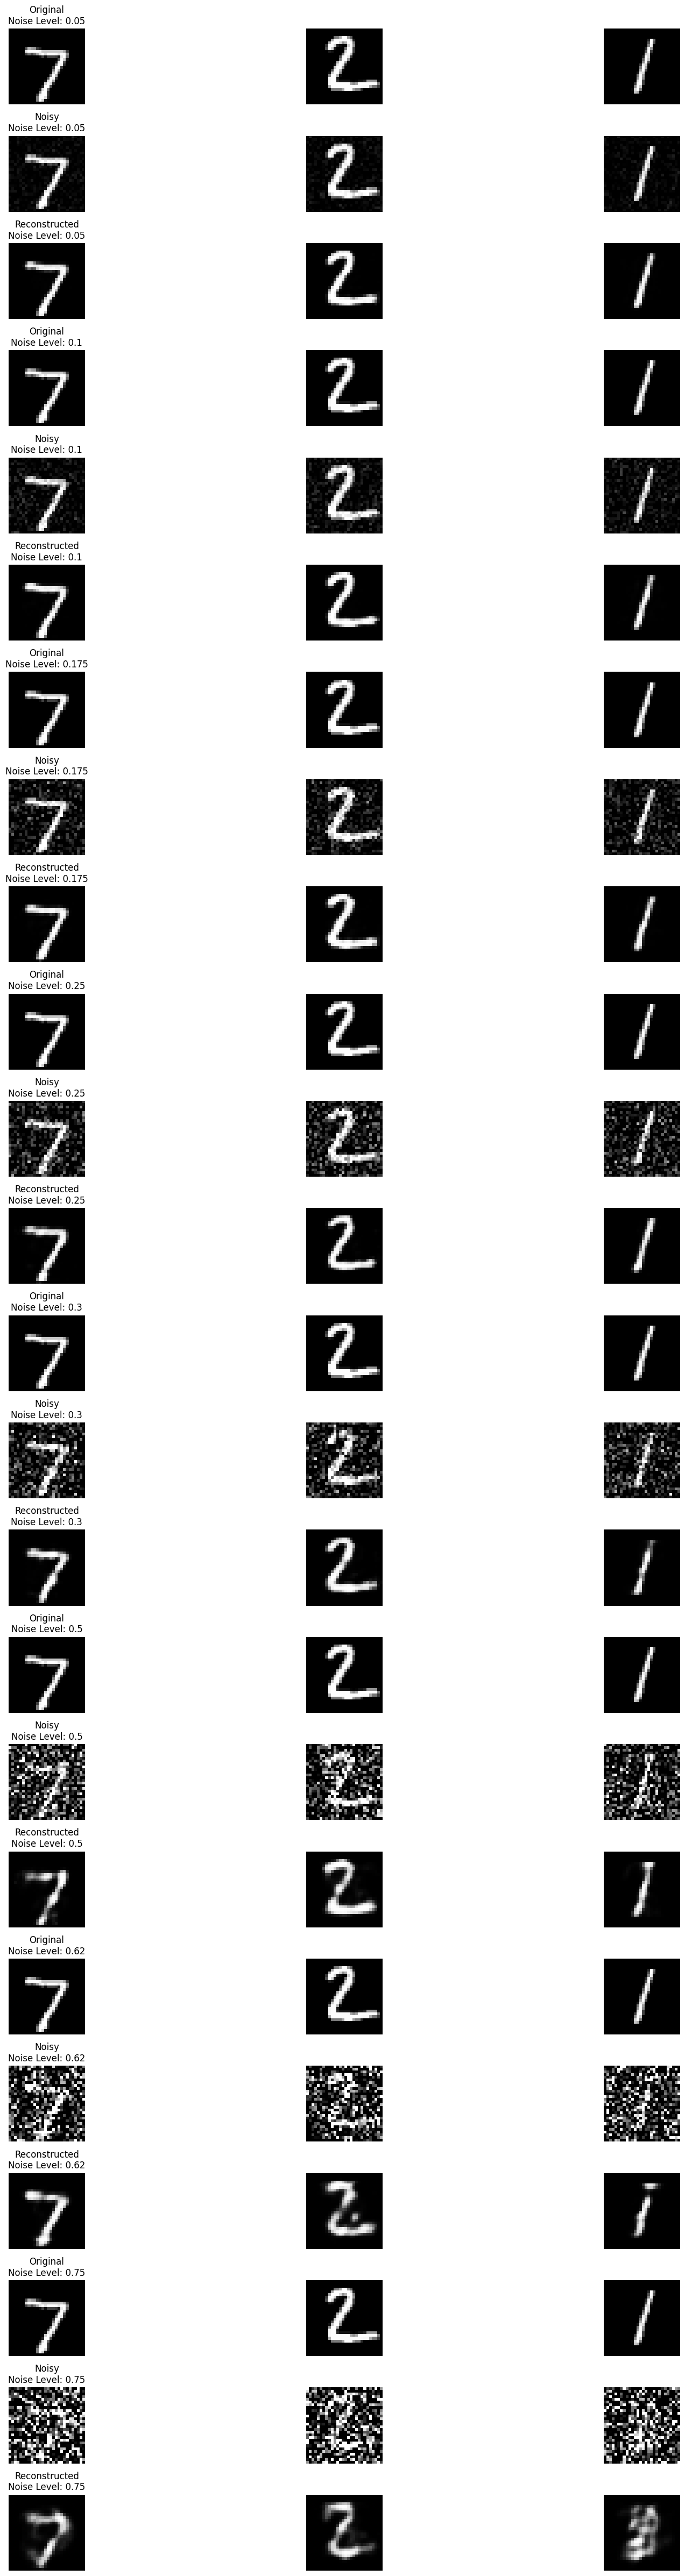

In [27]:
def display_comparison(models, noise_levels, test_images, n_images=10):
    num_levels = len(models)
    plt.figure(figsize=(20, 6 * num_levels))  # Adjust size to accommodate titles and more rows

    for idx, (model, noise_level) in enumerate(zip(models, noise_levels)):
        # Add noise to the test data
        noisy_images = add_noise(test_images.reshape(-1, 28, 28), noise_level)  # Ensure input is in 28x28 format for noise addition
        # Flatten the noisy images for prediction
        noisy_images_flat = noisy_images.reshape(noisy_images.shape[0], -1)
        # Predict the reconstructed images from the noisy data
        reconstructed_images = model.predict(noisy_images_flat)

        for i in range(n_images):
            # Original Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + (idx * 3 * n_images))
            plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape flat images to 28x28 for display
            if i == 0:
                plt.title(f"Original\nNoise Level: {noise_level}")
            plt.axis('off')

            # Noisy Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + n_images + (idx * 3 * n_images))
            plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')  # Reshape flat noisy images to 28x28 for display
            if i == 0:
                plt.title(f"Noisy\nNoise Level: {noise_level}")
            plt.axis('off')

            # Reconstructed Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + 2 * n_images + (idx * 3 * n_images))
            plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')  # Reshape flat predictions to 28x28 for display
            if i == 0:
                plt.title(f"Reconstructed\nNoise Level: {noise_level}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example call (ensure to replace `dae_models`, `noise_levels`, `test_images_flat` with your actual variables)
display_comparison(dae_models, noise_levels, test_images_flat, n_images=3)


###Evaluation

In [28]:
from keras.losses import MeanSquaredError

# Function to calculate MSE
def calculate_mse(original, reconstructed):
    mse = MeanSquaredError()
    return mse(original, reconstructed).numpy()

reconstruction_errors = []

for i, noise_level in enumerate(noise_levels):
    print(f"Calculating reconstruction error for noise level: {noise_level}")
    # Add noise to original test images
    noisy_test_images = add_noise(test_images_flat, noise_factor=noise_level)

    # Use the DAE to reconstruct images from the noisy dataset
    reconstructed_images = dae_models[i].predict(noisy_test_images)

    # Calculate MSE between original and reconstructed images
    error = calculate_mse(test_images_flat, reconstructed_images)
    reconstruction_errors.append(error)
    print(f"Reconstruction MSE at noise level {noise_level}: {error:.4f}")

Calculating reconstruction error for noise level: 0.05
313/313 [==============================] - 1s 2ms/step
Reconstruction MSE at noise level 0.05: 0.0021
Calculating reconstruction error for noise level: 0.1
313/313 [==============================] - 1s 2ms/step
Reconstruction MSE at noise level 0.1: 0.0026
Calculating reconstruction error for noise level: 0.175
313/313 [==============================] - 1s 2ms/step
Reconstruction MSE at noise level 0.175: 0.0039
Calculating reconstruction error for noise level: 0.25
313/313 [==============================] - 1s 3ms/step
Reconstruction MSE at noise level 0.25: 0.0056
Calculating reconstruction error for noise level: 0.3
313/313 [==============================] - 1s 2ms/step
Reconstruction MSE at noise level 0.3: 0.0072
Calculating reconstruction error for noise level: 0.5
313/313 [==============================] - 1s 3ms/step
Reconstruction MSE at noise level 0.5: 0.0148
Calculating reconstruction error for noise level: 0.62
313/313

##AutoEncoder Classifier

In [29]:
def build_classifier(encoded_dim):
    inputs = Input(shape=(encoded_dim,))
    x = Dense(64, activation='relu')(inputs)
    outputs = Dense(10, activation='softmax')(x)
    classifier_model = Model(inputs=inputs, outputs=outputs)
    classifier_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier_model

In [30]:
classifier_histories = []  # List to store histories for each noise level
classifier_test_losses = []
classifier_test_accuracies = []

for i, noise_level in enumerate(noise_levels):
    print(f"Building and training classifier for noise level: {noise_level}")
    autoencoder = dae_models[i]
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)
    noisy_test_images = add_noise(test_images_flat, noise_factor=noise_level)

    encoded_train = encoder.predict(noisy_train_images)
    encoded_test = encoder.predict(noisy_test_images)

    classifier = build_classifier(encoded_train.shape[1])
    history = classifier.fit(encoded_train, y_train, epochs=10, batch_size=32)
    classifier_histories.append(history)

    classifier_test_loss, classifier_test_accuracy = classifier.evaluate(encoded_test, y_test, verbose=0)
    print(f"Test accuracy for noise level {noise_level}: {classifier_test_accuracy}")
    classifier_test_losses.append(classifier_test_loss)
    classifier_test_accuracies.append(classifier_test_accuracy)

Building and training classifier for noise level: 0.05
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5682 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2405 - accuracy: 0.9300
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2118 - accuracy: 0.9383
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1914 - accuracy: 0.9433
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1722 - accuracy: 0.9489
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1626 - accuracy: 0.9508
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1528 - accuracy: 0.9549
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss

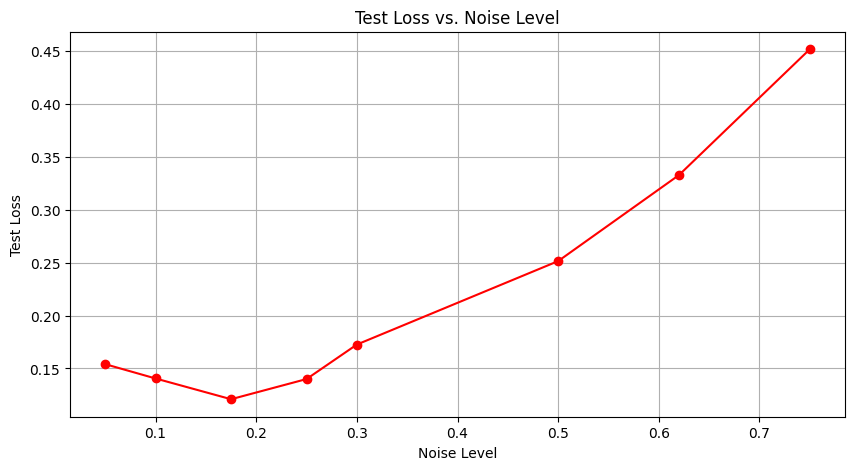

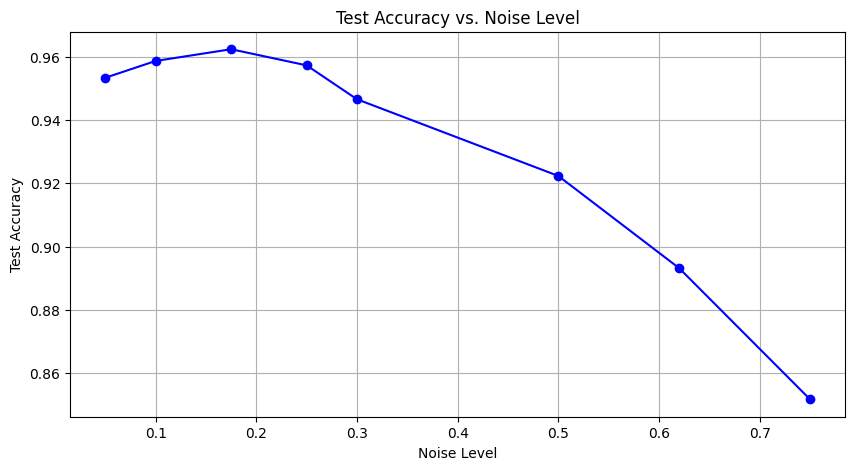

In [31]:
# Plotting test losses
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, classifier_test_losses, marker='o', linestyle='-', color='r')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.grid(True)

# Plotting test accuracies
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, classifier_test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.show()